In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
from game import Environment
from dqn import DQN, ReplayMemory
from agent import Agent
import matplotlib.pyplot as plt

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
BATCH_SIZE = 256
GAMMA = 0.999
TAU = 0.005
LR = 0.0001
EPS_DECAY = 0.995

performance = []

In [3]:
env = Environment()
state = env.reset()
n_observations = len(state)
n_actions = 2

In [4]:
for lr in LR:
    agent = Agent(n_observations, n_actions, batch_size=BATCH_SIZE, epsilon_decay=EPS_DECAY, gamma=GAMMA, tau=TAU, lr=lr)

    num_episodes = 900

    for episode in range(num_episodes):
        state = env.reset()
        done = False
        total_reward = 0
        steps = 0

        while not done:
            action = agent.nextAction(state)
            next_state, reward, done = env.step(action)
            
            agent.storeTransition(state, action, reward, next_state, done)

            state = next_state
            total_reward += reward

            agent.replay()
            agent.updateTargetNetwork()

            steps += 1
            if steps > 1000:
                break

        agent.decayEpsilon()

        if episode % 100 == 0:
            print(f"Episode {episode}, Steps: {steps}, Total Reward: {total_reward}, Epsilon: {agent.epsilon:.2f}")

    # Test the model
    test_episodes = 100
    total_rewards = []
    for _ in range(test_episodes):
        state = env.reset()
        done = False
        total_reward = 0
        steps = 0

        while not done and steps < 1500:
            action = agent.target_net.action(state)
            next_state, reward, done = env.step(action)
            state = next_state
            total_reward += reward
            steps += 1

        total_rewards.append(total_reward)
    avg_reward = sum(total_rewards) / test_episodes
    performance.append(avg_reward)
    print(f"Lr: {lr}, Average Reward: {avg_reward}")

Episode 0, Steps: 38, Total Reward: 27, Epsilon: 0.99
Episode 100, Steps: 55, Total Reward: 44, Epsilon: 0.60
Episode 200, Steps: 67, Total Reward: 56, Epsilon: 0.37
Episode 300, Steps: 55, Total Reward: 44, Epsilon: 0.22
Episode 400, Steps: 84, Total Reward: 73, Epsilon: 0.13
Episode 500, Steps: 64, Total Reward: 53, Epsilon: 0.08
Episode 600, Steps: 84, Total Reward: 73, Epsilon: 0.05
Episode 700, Steps: 580, Total Reward: 569, Epsilon: 0.03
Episode 800, Steps: 352, Total Reward: 341, Epsilon: 0.02
Lr: 0.0001, Average Reward: 965.74
Episode 0, Steps: 40, Total Reward: 29, Epsilon: 0.99
Episode 100, Steps: 39, Total Reward: 28, Epsilon: 0.60
Episode 200, Steps: 48, Total Reward: 37, Epsilon: 0.37
Episode 300, Steps: 84, Total Reward: 73, Epsilon: 0.22
Episode 400, Steps: 57, Total Reward: 46, Epsilon: 0.13
Episode 500, Steps: 57, Total Reward: 46, Epsilon: 0.08
Episode 600, Steps: 95, Total Reward: 84, Epsilon: 0.05
Episode 700, Steps: 102, Total Reward: 91, Epsilon: 0.03
Episode 800,

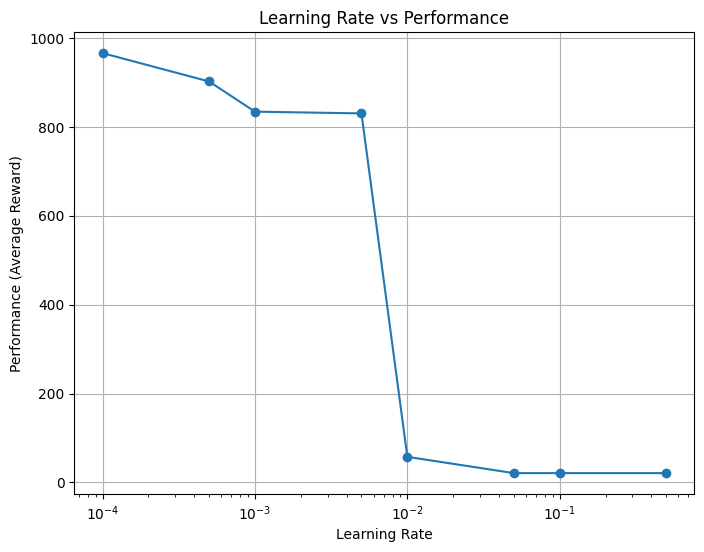

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(LR, performance, marker='o')
plt.title('Learning Rate vs Performance')
plt.xlabel('Learning Rate')
plt.ylabel('Performance (Average Reward)')
plt.xscale('log')
plt.grid(True)
plt.show()